# Домашняя работа 9. Деревья решений. (32 балла)

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

## Полезная литература

- [Habrahabr: ODS деревья решений](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy)
- [ВМК МГУ семинары по решающим деревьям](https://github.com/esokolov/ml-course-msu/blob/master/ML16/lecture-notes/Sem04_trees.pdf)
- [Sklearn Decision Trees](http://scikit-learn.org/stable/modules/tree.html)

## 1. Сравнение моделей деревьев

В этом блоке вы сравните разные конфигурации композиций деревьев:
- DecisionTree
- Bagging
- Bagging с другими настройками подбора признаков для разбиения
- RandomForest

Будем использовать [датасет с винишком](https://archive.ics.uci.edu/ml/datasets/wine+quality) - это задача то ли классификации то ли регресси - нужно предсказывать качество вина. Будем думать что это классификация.

![](https://upload.wikimedia.org/wikipedia/en/thumb/7/7c/Lulz_Security.svg/300px-Lulz_Security.svg.png)

### 1.1 Чтение данных (1 балла)

Данные лежат как обычно в `'../../data/winequality-red.csv.gz'`.

- Прочитайте их с помощью pandas
- нарисуйте countplot целевого признака `quality`.
- Что вы думаете по поводу количества представителей каждого класса.
- Разбейте данные на X и y.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
!ls

df = pd.read_csv('data/data_winequality-red.csv.gz', sep=';')
df.head()

adult.csv.gz
data
Homework_1.ipynb
titanic_train.csv
week01_homework_01_homework.ipynb
week04_homework_04-01-clustering-homework.ipynb
week04_workshop_04-01-clustering-workshop.ipynb
week05_workshop_05-01-clustering-workshop.ipynb
week06_workshop_06-01-linear-regression-homework.ipynb
week07_workshop_07-01-classification.ipynb
week08_workshop_08-01-text-classification-bayes_workshop.ipynb
week09_09-02-decision-trees-workshop.ipynb
week10_10-02-ensembles-workshop.ipynb
week2_homework_02-01-homework-numpy.ipynb
week2_homework_02-02-homework-pandas.ipynb
week2_workshop_02-01-workshop-numpy.ipynb
week2_workshop_02-02-workshop-pandas.ipynb
week3_homework_03-01-visualisation-homework.ipynb
week3_workshop_03-01-visualisation-workshop.ipynb
Workshop_1.ipynb


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


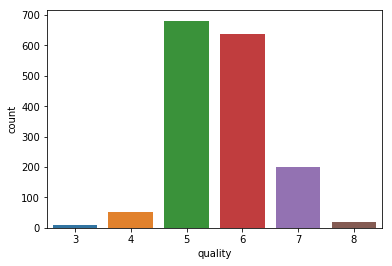

In [12]:
sns.countplot(x = df['quality'], data = df)

In [14]:
X = df.drop(columns='quality')

In [15]:
y = df['quality']

### 1.2 Сравнение моделей (4 балла)

Задача классификации. Все признаки уже числовые. Значит можно пробовать просто все модели и выбрать лучшую. Так и поступим, сделайте кросс валидацию на 5 фолдах, используя `sklearn.model_selection.KFold` как аргумент у `cross_val_score`. Метрика качества будет `accuracy`.

Алгоритмы для тестирования:
- KNeighborsClassifier с 10 соседями
- KNeighborsClassifier с 10 соседями и масштабированием StandartScaler
- RidgeClassifier
- DecisionTreeClassifier 
- BaggingClassifier c 100 деревьев
- BaggingClassifier с 100 деревьев и каждое дерево обучается только по половине случайно выбранных признаков (см аргументы)
- RandomForestClassifier c 100 деревьев

Выведите среднее значение метрики качества для каждого из классификаторов. 

**hint**: каждый следующий алгоритм, будет показывать качество лучше, чем предыдущий. Если у вас не так - то что-то вы делаете неправильно. Везде зафиксируйте random_state=42.

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

reg = KNeighborsClassifier(n_neighbors=10)
print("KNeighborsClassifier(10):",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
scaler = StandardScaler()
X_2 = X 
X_2 = scaler.fit_transform(X_2, y)
reg = KNeighborsClassifier(n_neighbors=10)
print("KNeighborsClassifier(10) with StandartScaler:",cross_val_score(reg, X_2, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
reg = RidgeClassifier(random_state=42)
print("RidgeClassifier:",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
reg_tree = DecisionTreeClassifier(random_state=42)
print("DecisionTreeClassifier:",cross_val_score(reg_tree, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
reg = BaggingClassifier(base_estimator = reg_tree, n_estimators=100, random_state = 42)
print("BaggingClassifier:",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
reg = BaggingClassifier(base_estimator = reg_tree, n_estimators=100, max_features=0.5, random_state = 42)
print("BaggingClassifier(half features):",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())
reg = RandomForestClassifier(random_state = 42)
print("RandomForestClassifier:",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 5, random_state=42)).mean())

KNeighborsClassifier(10): 0.44902821316614416
KNeighborsClassifier(10) with StandartScaler: 0.5490889498432602
RidgeClassifier: 0.575384012539185
DecisionTreeClassifier: 0.45154584639498435
BaggingClassifier: 0.5703585423197493
BaggingClassifier(half features): 0.5691281347962381
RandomForestClassifier: 0.5428663793103448


/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/evggenshch/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/evggenshch/.local/lib/python3.6/si

### 1.3 Расуждения (8 баллов)

Ответьте на вопросы развернуто, можете полистать литературу:

- почему наблюдается значимая разница в качестве у KNeighborsClassifier с масштабированием и без
- почему масштабирование не важно для деревьев решений
- почему бэггинг на половине признаков для каждого дерева дал качество предсказания больше, чем на всех? (а он дал!)
- у какой модели наибольшей отклонение от среднего качества предсказаний? А почему??

Поскольку KNeighborsClassifier линейная модель, масштабирование позволяет уравновесить признаки.
Деревья решения рассматривают признаки по отдельности, поэтому для них масштабирование играет меньшую роль.

## 2 Переобучение и Ко

В последнем задании вы уже заметили, что случайный лес может вести себя немного нестабильно. В этом задании мы возьмем опять датасет MNIST(простите) и будем его решать деревьями. Почему мы взяли его? Потому что в нем фактически много разных признаков (значения пикселей в пространстве), а деревья строятся делая разбиения по признакам. Обычно на эти разбиения не обращают внимание, так как главное что тюнят - это глубина дереьвев, количество деревьев, а кучу других параметров обходят стороной, так как они "неясные". Попробуем прояснить их.

### 2.1 Загрузка датасета (1 балл)

Загрузите датасет с помощью функции `sklearn.datasets.load_digits`. В нем будут 64px картинки в векторной форме.

Нарисуйте первые 10 цифр в одной ячейке, чтобы было красиво.

(1797, 64)


<Figure size 432x288 with 0 Axes>

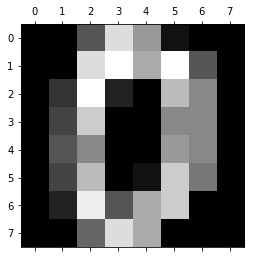

In [23]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape) 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

### 2.2 Перебор классификаторов (3 балла)

В этом задании вам снова придется перебрать несколько классификаторов, но теперь мы обратим внимание на другие гиперпараметры и их влияние на качество классификации, кстати опять `accuracy`.

Сделайте кроссвалидацию на 10 фолдах, указав `cv=10` для следующих классификаторов:

- DecisionTreeClassifier с параметрами по-умолчанию
- BaggingClassifier с 100 деревьвев
- BaggingClassifier с 100 деревьев, НО с ограничением на максимальное количество признаков, участвующих при обучении каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков.
- BaggingClassifier с 100 деревьев, НО с ограничением на количество признаков участвующих в разбиении для каждого из деревьев в $\sqrt{N}$, где $N$ - это число признаков. Это отличается от предыдущей модели тем, где ограничивается `max_features`. Читайте документацию :trollface:
- обычный случайный лес со 100 деревьями

In [ ]:
reg2 = DecisionTreeClassifier()
print("KNeighborsClassifier(10):",cross_val_score(reg, X, y, scoring='accuracy', cv=KFold(n_splits = 10, random_state=42)))
reg2 = BaggingClassifier()
reg_tree2 = DecisionTreeClassifier(random_state=42)
reg2 = BaggingClassifier(base_estimator = reg_tree, n_estimators=100, random_state = 42)
print("BaggingClassifier:",cross_val_score(reg2, X, y, scoring='accuracy', cv=KFold(n_splits = 10, random_state=42)).mean())

### 2.3 В чём разница? (3 балла)

Ответье на вопрос: 

Странно то как? Почему ограничение на количество признаков в разбиении дерева и ограничение в количестве признаков для построения каждого дерева в BaggingClasifier дало СОВСЕМ разный результат в качестве предсказания? В чем магия?

![](https://i.ytimg.com/vi/_5GWMIAHc08/hqdefault.jpg)

### 2.4 Количество деревьев (2 балла)

Сделайте перебор количества деревьев для `RandomForestClassifier`. Сохраните качества кросс валидации на 10 фолдах для `[1,5,10,15,50,100,150,200,300]` количества деревьев. Нарисуйте график, где по оси x - количество деревьев, а по оси y - качество. При каком количестве деревьев получается самое хорошее качество?

### 2.5 Количество признаков  (2 балла)

Переберите теперь максимальное количество признаков для `RandomForestClassifier` на 100 деревьях, от 1 до 64 с шагом 5. Постройте график качества по кроссвалидации на 10 фолдах.

### 2.5 Вопросы по RandomForest (8 баллов)

Ответьте на вопросы:

- Что происходит с ростом числа деревьев у случайного леса. Можно ли просто всегда брать 5000 деревьев и быть счастливым?
- Как зависит качество предсказания в дереве в зависимости от max_features?
- Почему качество зависит от max_features?
- Как глубина деревьев влияет на качество случайного леса?

![](https://habrastorage.org/web/ad8/366/a44/ad8366a4469346c6b2e1306495b05d1a.jpg)